# Environment Set Up

Load in the necessary libraries

In [14]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import seaborn as sns
sns.set_palette('Set2')
sns.set_style(style = 'darkgrid')
import matplotlib.pyplot as plt
plt.figure(figsize = (8,5))

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

Load in the data structure, found on Kaggle

In [15]:
df = pd.read_csv('Crime Data Set_Baltimore.csv')

Data Overview:

In [16]:
df.shape

(276529, 15)

In [17]:
df.columns

Index(['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description',
       'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood',
       'Longitude', 'Latitude', 'Location 1', 'Premise', 'Total Incidents'],
      dtype='object')

In [18]:
df.describe()

,Post,Longitude,Latitude,Total Incidents
count,276305.000000,274325.000000,274325.000000,276529.0
mean,506.256821,-76.617444,39.307399,1.0
std,260.735370,0.042306,0.029556,0.0
min,2.000000,-76.711620,39.200410,1.0
25%,243.000000,-76.648460,39.288330,1.0
50%,511.000000,-76.613960,39.303640,1.0
75%,731.000000,-76.587440,39.327810,1.0
max,945.000000,-76.528500,39.372930,1.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276529 entries, 0 to 276528
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeDate        276529 non-null  object 
 1   CrimeTime        276529 non-null  object 
 2   CrimeCode        276529 non-null  object 
 3   Location         274322 non-null  object 
 4   Description      276529 non-null  object 
 5   Inside/Outside   266250 non-null  object 
 6   Weapon           95577 non-null   object 
 7   Post             276305 non-null  float64
 8   District         276449 non-null  object 
 9   Neighborhood     273789 non-null  object 
 10  Longitude        274325 non-null  float64
 11  Latitude         274325 non-null  float64
 12  Location 1       274325 non-null  object 
 13  Premise          265772 non-null  object 
 14  Total Incidents  276529 non-null  int64  
dtypes: float64(3), int64(1), object(11)
memory usage: 31.6+ MB


In [20]:
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1
1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1
2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1
3,09/02/2017,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1
4,09/02/2017,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1


# Data Cleaning

In [21]:
null_count = df.isnull().sum()
null_prop = null_count / len(df)
pd.DataFrame({
    'Count': null_count,
    'Proportion': null_prop})

,Count,Proportion
CrimeDate,0,0.000000
CrimeTime,0,0.000000
CrimeCode,0,0.000000
Location,2207,0.007981
Description,0,0.000000
Inside/Outside,10279,0.037172
Weapon,180952,0.654369
Post,224,0.000810
District,80,0.000289
Neighborhood,2740,0.009909


What's the deal with all of the Weapon nulls? Let's make a sole dataframe with only null values for weapons, and see what we can find.

In [22]:
df0 = df[df['Weapon'].isnull()]

C:\Users\Raj Bhuva\AppData\Local\Temp\ipykernel_31376\1265790535.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


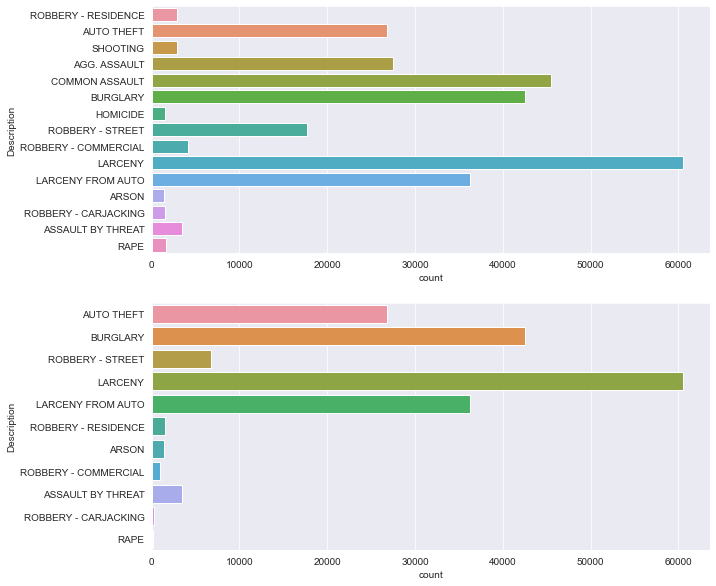

In [23]:
fig, ax = plt.subplots(2,1)
sns.countplot(y = df['Description'], ax = ax[0])
sns.countplot(y= df0['Description'], ax = ax[1])
fig.set_size_inches(10,10)
fig.show()

Comparing the two types of crime committed with weapons versus null weapons, it is reasonable to assume that null values for weapons means that there was no weapon involved. Let's replace the nulls with "NO WEAPON".

In [24]:
df['Weapon'].fillna('NO WEAPON', inplace = True)

Cleaning CrimeDate and CrimeTime

In [25]:
df['CrimeTime'] = df['CrimeTime'].str.replace('24:00:00', '00:00:00')

In [26]:
df['Date'] = df['CrimeDate'] + ' ' + df['CrimeTime']
df['Date'] = pd.to_datetime(df['Date'])

In [27]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Weekday'] = df['Date'].dt.weekday + 1
df['Hour'] = df['Date'].dt.hour

In [28]:
df = df.drop(['CrimeDate', 'CrimeTime'], axis = 1)

In [29]:
df = df.set_index('Date')

Cleaning Inside/Outside

In [30]:
df['Inside/Outside'].value_counts()
df['Inside/Outside'] = df['Inside/Outside'].replace('I', 'Inside')
df['Inside/Outside'] = df['Inside/Outside'].replace('O', 'Outside')

# Data Visualization

Day of Month

[]

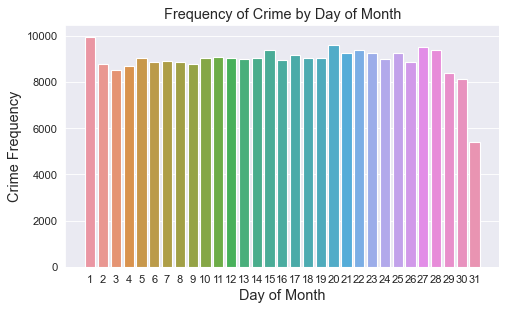

In [31]:
plt.figure(figsize=(7,4), dpi=80)

plt.title('Frequency of Crime by Day of Month', fontsize=13)
ax = sns.countplot(x = 'Day', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Day of Month', fontsize=13)
plt.plot()

Month

[]

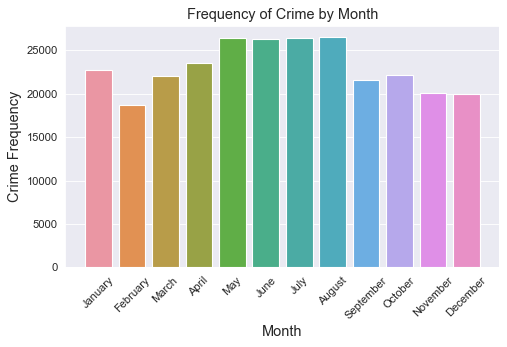

In [32]:
plt.figure(figsize=(7,4), dpi=80)

plt.title('Frequency of Crime by Month', fontsize=13)
ax = sns.countplot(x = 'Month', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Month', fontsize=13)
plt.xticks(rotation = 45)
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] 
ax.set_xticklabels(labels)
plt.plot()

Year

[]

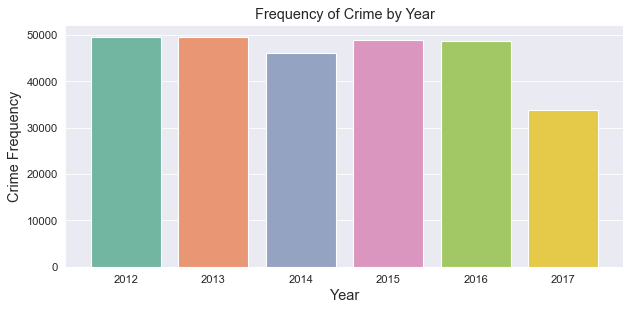

In [33]:
plt.figure(figsize=(9,4), dpi=80)

plt.title('Frequency of Crime by Year', fontsize=13)
ax = sns.countplot(x = 'Year', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.plot()

Weekday

[]

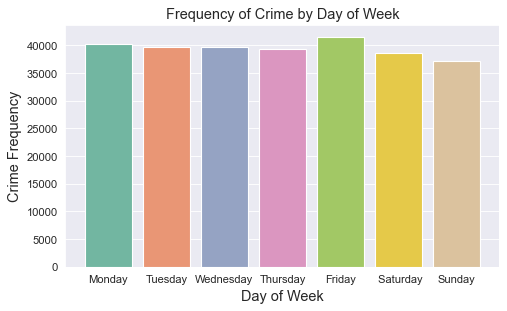

In [34]:
plt.figure(figsize=(7,4), dpi=80)

plt.title('Frequency of Crime by Day of Week', fontsize=13)
ax = sns.countplot(x = 'Weekday', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Day of Week', fontsize=13)
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',' Saturday', 'Sunday']
ax.set_xticklabels(labels)
plt.plot()

Weekday and Description (messy)

[]

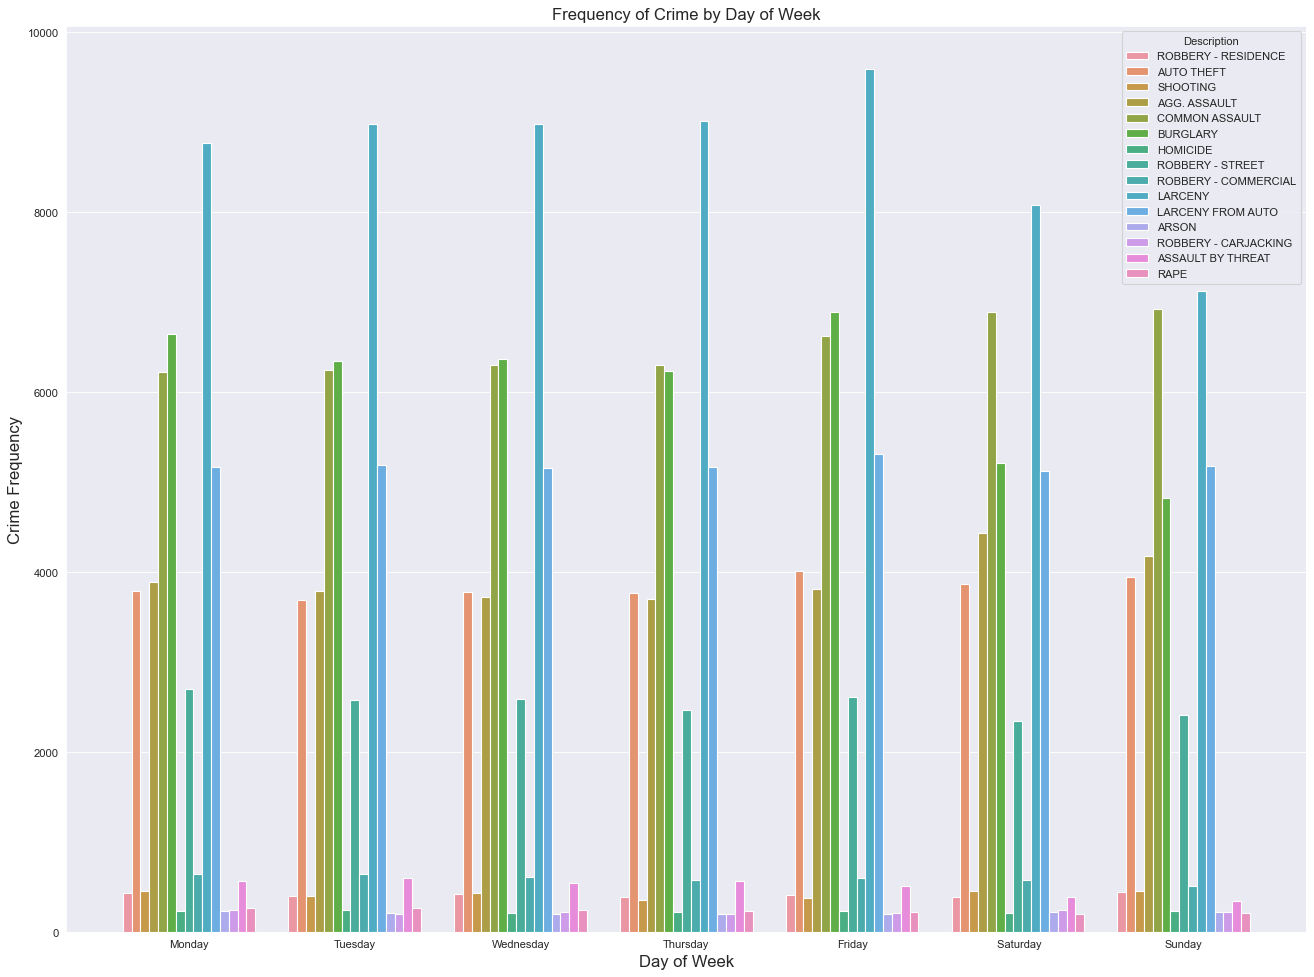

In [35]:
plt.figure(figsize=(20,15), dpi=80)

plt.title('Frequency of Crime by Day of Week', fontsize=15)
ax = sns.countplot(x = 'Weekday', hue = 'Description', data = df)
plt.ylabel("Crime Frequency", fontsize=15)
plt.xlabel('Day of Week', fontsize=15)
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',' Saturday', 'Sunday']
ax.set_xticklabels(labels)
plt.plot()

Hour of Day

[]

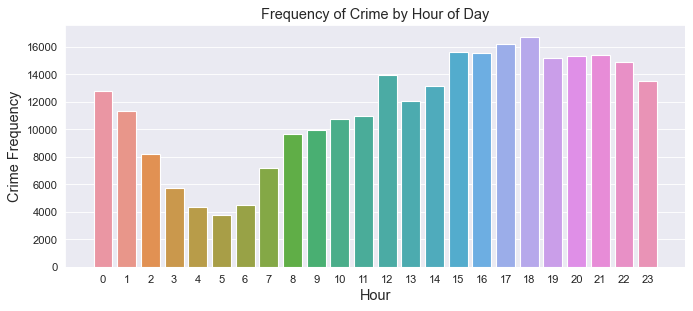

In [36]:
plt.figure(figsize=(10,4), dpi=80)

plt.title('Frequency of Crime by Hour of Day', fontsize=13)
ax = sns.countplot(x = 'Hour', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Hour', fontsize=13)
plt.plot()

Crime Description

[]

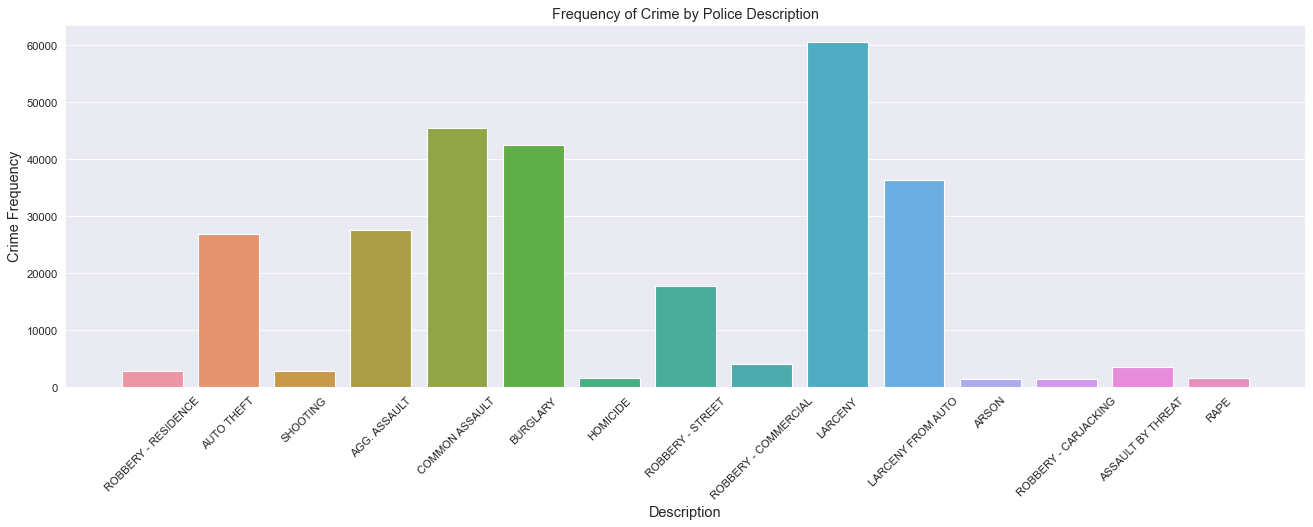

In [37]:
plt.figure(figsize=(20,6), dpi=80)

plt.title('Frequency of Crime by Police Description', fontsize=13)
ax = sns.countplot(x = 'Description', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Description', fontsize=13)
plt.xticks(rotation = 45)
plt.plot()

Inside/Outside

[]

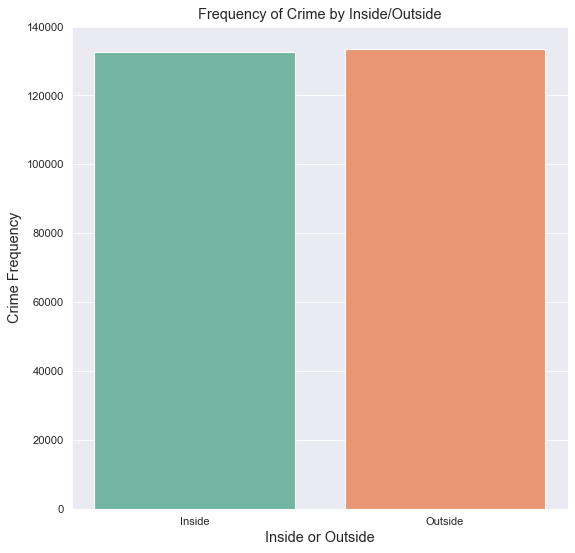

In [38]:
plt.figure(figsize=(8,8), dpi=80)

plt.title('Frequency of Crime by Inside/Outside', fontsize=13)
ax = sns.countplot(x = 'Inside/Outside', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Inside or Outside', fontsize=13)
plt.plot()

Weapon Used

[]

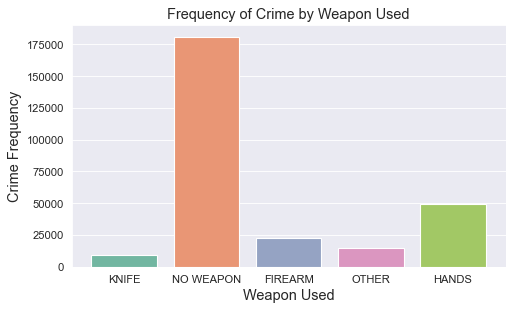

In [39]:
plt.figure(figsize=(7,4), dpi=80)

plt.title('Frequency of Crime by Weapon Used', fontsize=13)
ax = sns.countplot(x = 'Weapon', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Weapon Used', fontsize=13)
plt.plot()

Weapon and Year

[]

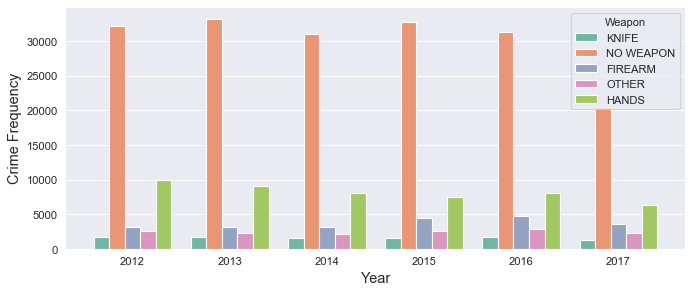

In [40]:
plt.figure(figsize = (10, 4), dpi = 80)

ax = sns.countplot(x = "Year", hue = "Weapon", data = df)
plt.ylabel("Frequency of Crime per Year Grouped by Weapon Used", fontsize = 13)
plt.ylabel("Crime Frequency", fontsize = 13)
plt.xlabel("Year", fontsize = 13)
plt.plot()

District

[]

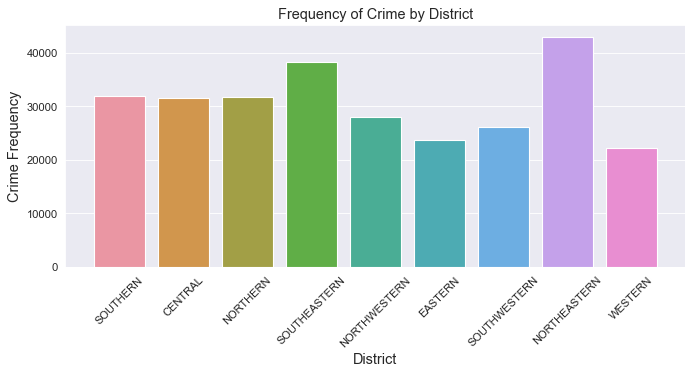

In [41]:
plt.figure(figsize=(10,4), dpi=80)

plt.title('Frequency of Crime by District', fontsize=13)
ax = sns.countplot(x = 'District', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('District', fontsize=13)
plt.xticks(rotation = 45)
plt.plot()

District and Inside/Outside

[]

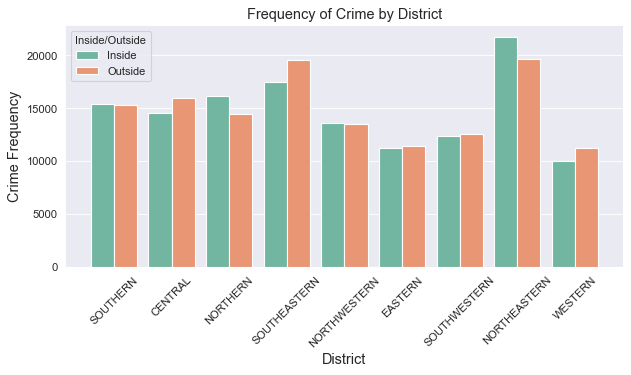

In [42]:
plt.figure(figsize=(9,4), dpi=80)

plt.title('Frequency of Crime by District', fontsize=13)
ax = sns.countplot(x = 'District', hue = 'Inside/Outside', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('District', fontsize=13)
plt.xticks(rotation = 45)
plt.plot()

# Folium Map

In [44]:
import folium
from folium.plugins import HeatMap

In [45]:
df = df[pd.notnull(df['Latitude'])]
df = df[pd.notnull(df['Longitude'])]

In [46]:
df['Latitude'].median()

39.30364

In [47]:
df['Longitude'].median()

-76.61396

In [48]:
def generateBaseMap(default_location = [39.30364, -76.6139599], default_zoom_start = 12):
    base_map = folium.Map(location = default_location, control_scale = True, zoom_start = default_zoom_start)
    return base_map

In [49]:
base_map = generateBaseMap()

In [50]:
df['count'] = 1

In [51]:
df_murder = df[df['Description'] == 'HOMICIDE']

In [52]:
HeatMap(
        data = df_murder[['Latitude', 'Longitude', 'count']].groupby(
            ['Latitude', 'Longitude']).sum().reset_index().values.tolist(),
        radius = 8,
        max_zoom = 13).add_to(base_map)
base_map